Streaming output truncated to the last 5000 lines.
Min dist:  397 Min idx:  21
Min dist:  396 Min idx:  21
Min dist:  395 Min idx:  21
Min dist:  394 Min idx:  21
Min dist:  393 Min idx:  21
Min dist:  392 Min idx:  21
Min dist:  391 Min idx:  21
Min dist:  390 Min idx:  21
Min dist:  389 Min idx:  21
Min dist:  388 Min idx:  21
Min dist:  387 Min idx:  21
Min dist:  386 Min idx:  21
Min dist:  385 Min idx:  21
Min dist:  384 Min idx:  21
Min dist:  383 Min idx:  21
Min dist:  382 Min idx:  21
Min dist:  381 Min idx:  21
Min dist:  380 Min idx:  21
Min dist:  379 Min idx:  21
Min dist:  378 Min idx:  21
Min dist:  377 Min idx:  21
Min dist:  376 Min idx:  21
Min dist:  375 Min idx:  21
Min dist:  374 Min idx:  21
Min dist:  373 Min idx:  21
Min dist:  372 Min idx:  21
Min dist:  371 Min idx:  21
Min dist:  370 Min idx:  21
Min dist:  369 Min idx:  21
Min dist:  368 Min idx:  21
Min dist:  367 Min idx:  21
Min dist:  366 Min idx:  18
Min dist:  365 Min idx:  18
Min dist:  364 Min idx:  

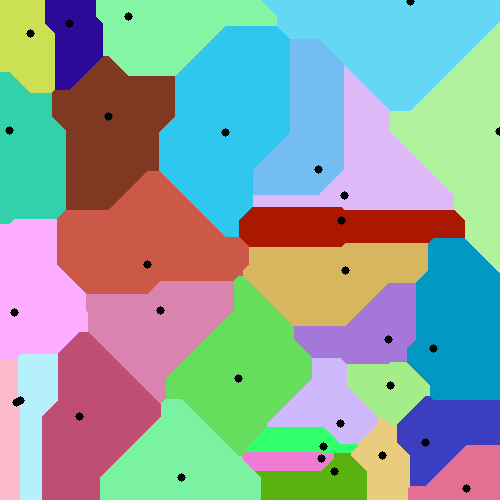

-1

In [ ]:
import cv2 as cv
import numpy as np
import randomcolor 
from google.colab.patches import cv2_imshow

N = 500
N_points = 30
# metric = 'euclidean' 
metric = 'manhattan'

grid = np.zeros((N, N, 3),  np.uint8) + 255

rand_color = randomcolor.RandomColor()
str_colors = rand_color.generate( count=N_points, format_='rgb')
colors = []

for color in str_colors:
	col = tuple(map(int, color[4:-1].split(', ')))
	colors.append(col)


points = [(int(np.random.rand() * N), int(np.random.rand() * N)) for i in range(N_points)]

print('Points: ', points)
i = 0 
for point, color in zip(points, colors):
	cv.circle(grid, point, 4, color, -1)
	
	i+=1


def dist(p1, p2):
	if(metric == 'euclidean'):
		return ((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)**0.5

	if(metric == 'manhattan'):
		return abs(p2[1] - p1[1]) + abs(p2[0] - p1[0])	

for i in range(N):
	for j in range(N):
		p1 = (i, j)
		color = (0, 0, 0)
		min_dist = dist(p1 , points[0])
		min_idx = 0
		for k in range(N_points):
			d = dist(p1 , points[k])
			if(d < min_dist):
				min_idx = k
				min_dist = d
		print('Min dist: ', d, 'Min idx: ', min_idx)
		# cv.circle(grid, points[min_idx], 5, (0, 0, 255), 2)
		grid[j, i] = colors[min_idx]



i = 0 
for point, color in zip(points, colors):
	cv.circle(grid, point, 4, (0, 0, 0), -1)
	i+=1


cv2_imshow(grid)
cv.waitKey(0)